### Importing Libraries for data analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/refs/heads/master/spam.tsv", sep='\t')

In [3]:
print("numpy", np.__version__)
print("pandas", pd.__version__)

numpy 1.26.3
pandas 2.1.4


In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [7]:
df.shape

(5572, 4)

### Dataset Balancing

In [8]:
ham = df[df['label'] == 'ham' ]
ham.shape

(4825, 4)

In [9]:
spam = df[df['label'] == 'spam']

In [10]:
spam.shape

(747, 4)

In [11]:
ham = ham.sample(spam.shape[0])

In [12]:
ham.shape

(747, 4)

In [13]:
data = pd.concat([ham, spam], axis=0, ignore_index=True)
data.shape

(1494, 4)

In [14]:
data.sample(10)

,label,message,length,punct
854,spam,U are subscribed to the best Mobile Content Se...,131,1
126,ham,I don't run away frm u... I walk slowly &amp; ...,96,10
958,spam,09066362231 URGENT! Your mobile No 07xxxxxxxxx...,152,7
1405,spam,"ou are guaranteed the latest Nokia Phone, a 40...",145,6
568,ham,But I'm on a diet. And I ate 1 too many slices...,92,5
153,ham,Oh sorry please its over,24,0
363,ham,"Probably not, still going over some stuff here",46,1
673,ham,Haha... Hope ü can hear the receipt sound... G...,53,7
1018,spam,Free 1st week entry 2 TEXTPOD 4 a chance 2 win...,141,5
1119,spam,Hope you enjoyed your new content. text stop t...,118,5


### Visualization of the dataset

In [15]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (10, 4)
plt.style.use('ggplot')

In [16]:
ham.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

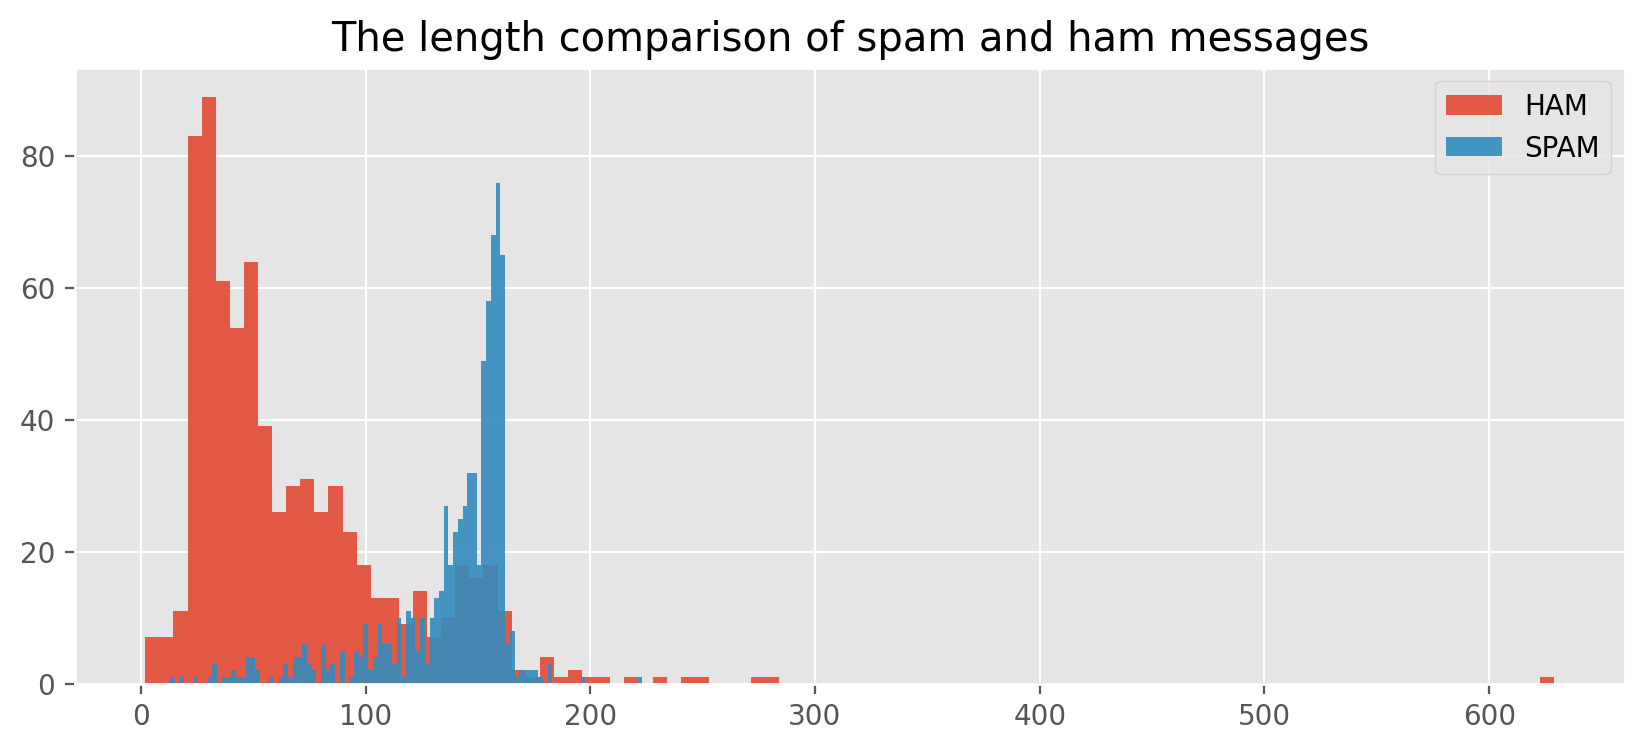

In [17]:
plt.hist(ham['length'], bins=100, alpha=0.9, label='HAM')
plt.hist(spam['length'], bins=100, alpha=0.9, label='SPAM')
plt.title("The length comparison of spam and ham messages")
plt.legend()
plt.show()

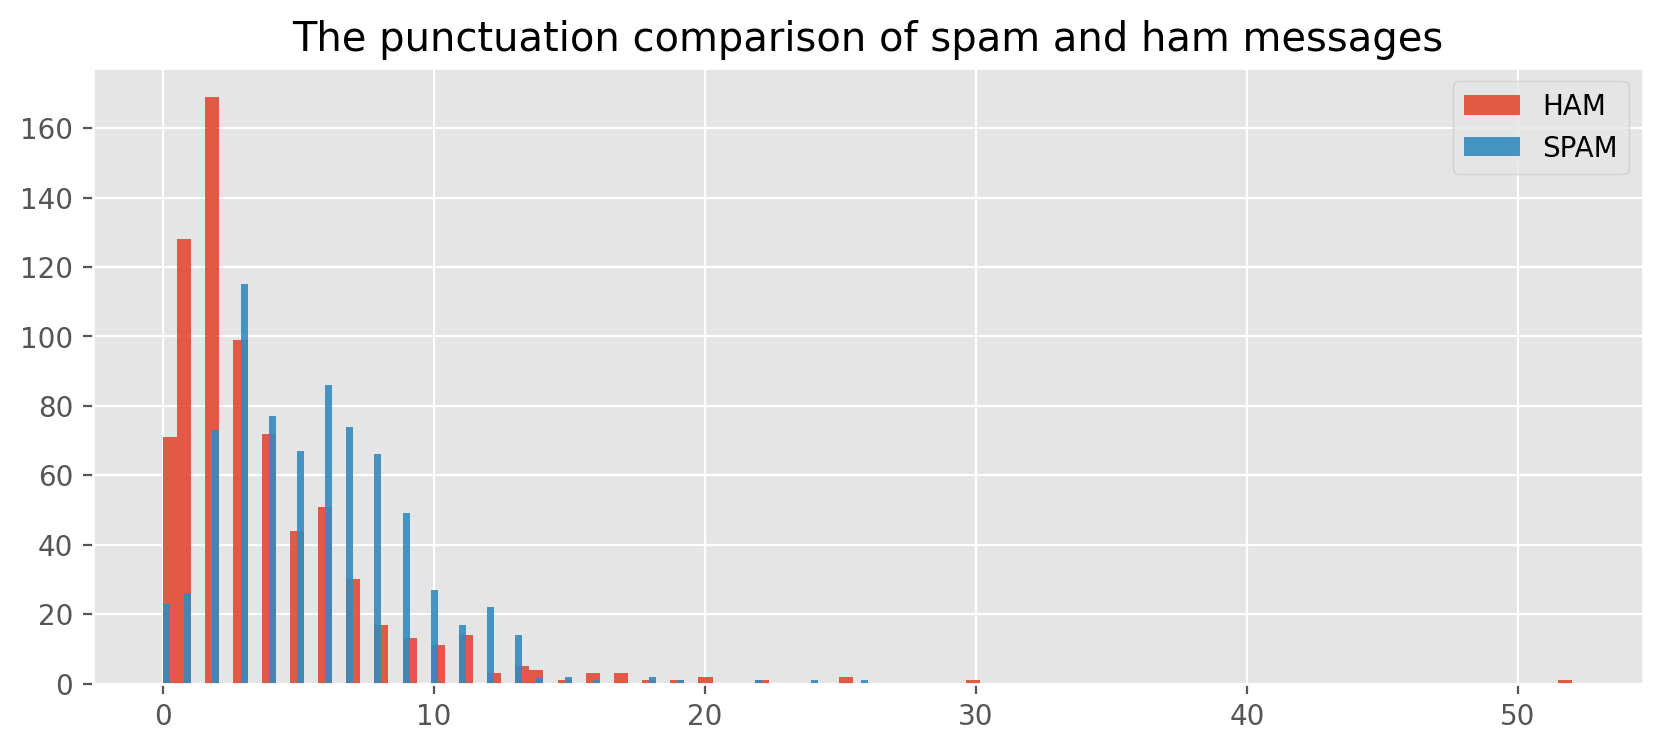

In [18]:
plt.hist(ham['punct'], bins=100, alpha=0.9, label='HAM')
plt.hist(spam['punct'], bins=100, alpha=0.9, label='SPAM')
plt.title("The punctuation comparison of spam and ham messages")
plt.legend()
plt.show()

### Training and testing of the data

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn

In [20]:
x_train, x_test, y_train, y_test = train_test_split(
    data['message'], data['label'], test_size=0.2, random_state=0, shuffle=True, stratify=data['label']
)


In [21]:
x_train.shape, x_test.shape

((1195,), (299,))

In [22]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('rfc', RandomForestClassifier(n_estimators = 100, n_jobs=-1))])
clf.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [23]:
y_pred = clf.predict(x_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.95       150
        spam       0.99      0.89      0.94       149

    accuracy                           0.94       299
   macro avg       0.95      0.94      0.94       299
weighted avg       0.95      0.94      0.94       299



In [25]:
clf.predict(["you have won lottery ticket worth $1000, please click here to claim", "Hi good evening"])

array(['spam', 'ham'], dtype=object)

In [26]:
clf.predict(["Congrats! 1 year special cinema pass for 2 people, click here to redeem it"])

array(['ham'], dtype=object)

In [27]:
clf.classes_

array(['ham', 'spam'], dtype=object)

In [28]:
import pickle

pickle.dump(clf, open('model.pkl', 'wb'))

In [8]:
print("sklearn", sklearn.__version__)

sklearn 1.3.0


In [29]:
model = pickle.load(open('model.pkl', 'rb'))

In [30]:
model.predict(["you have won lottery ticket worth $1000, please click here to claim", "Hi good evening"])

array(['spam', 'ham'], dtype=object)